<a href="https://colab.research.google.com/github/debashis1983/ChatBotAssignment/blob/master/Creating_Complex_Architecture_using_Functional_API.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

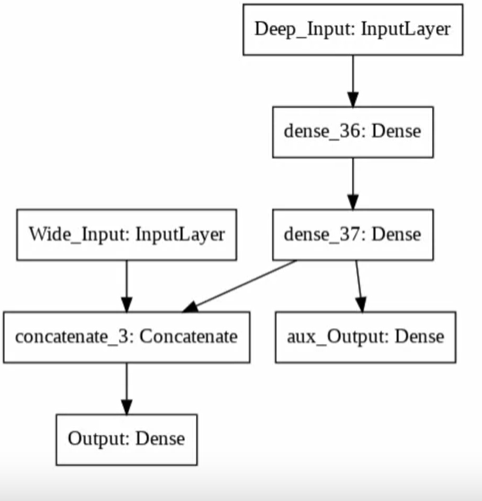

In [1]:
import tensorflow as tf

In [10]:
from tensorflow.keras.layers import Dense
from tensorflow.keras import Model
from tensorflow.keras.layers import concatenate
from tensorflow.keras.layers import Input
from tensorflow.keras.utils import plot_model
import tensorflow_datasets as tfds

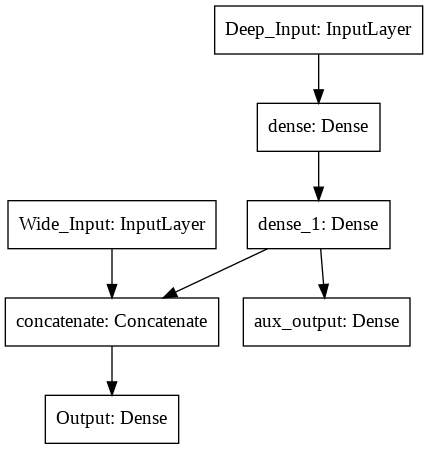

In [3]:
input_a = Input(shape=[1],name='Wide_Input')
input_b = Input(shape=[1],name='Deep_Input')

hidden1 = Dense(30,activation='relu')(input_b)
hidden2= Dense(30,activation='relu')(hidden1)

concat= concatenate([input_a,hidden2])
output = Dense(1,name='Output')(concat)
aux_output = Dense(1,name='aux_output')(hidden2)

model = Model(inputs=[input_a,input_b],outputs=[output,aux_output])

plot_model(model)


In [4]:
class WideAndDeepModel(Model):
  def __init__(self,units=30,activation='relu',**kwargs):
    super().__init__(**kwargs)
    self.hidden1 = Dense(units=units,activation=activation)
    self.hidden2= Dense(units=units,activation=activation)
    self.main_output = Dense(1)
    self.aux_output = Dense(1)

  def call(self,inputs):
    input_A,input_B = inputs
    hidden1 = self.hidden1(input_B)
    hidden2=self.hidden2(hidden1)
    concat = concatenate([input_A,hidden2])
    main_output = self.main_output(concat)
    aux_output = self.aux_output(hidden2)

    return main_output,aux_output

In [5]:
model = WideAndDeepModel()

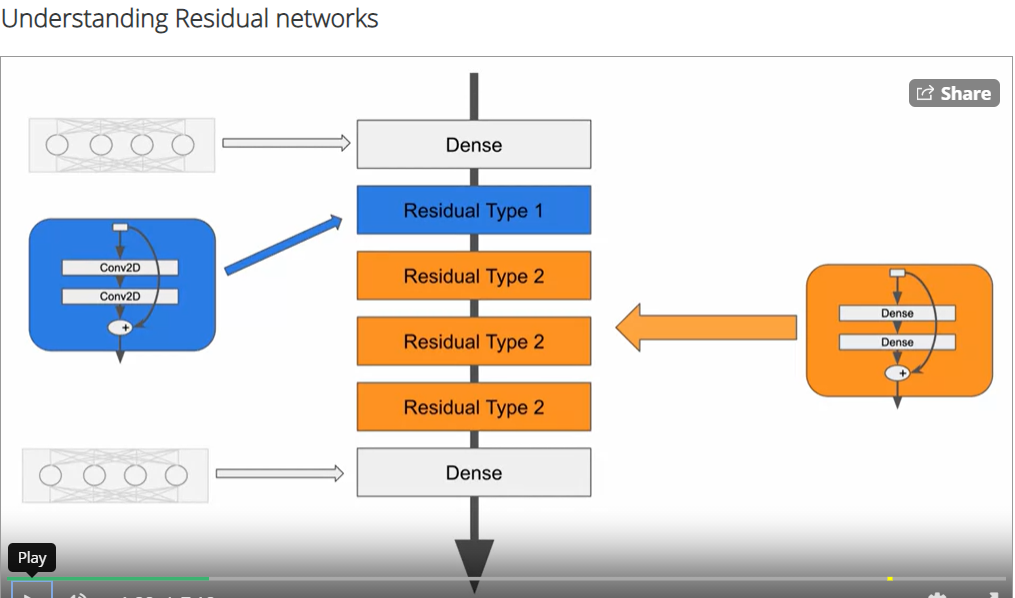

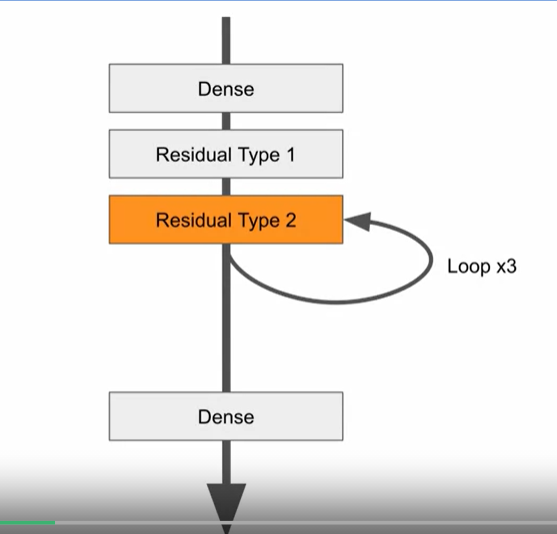

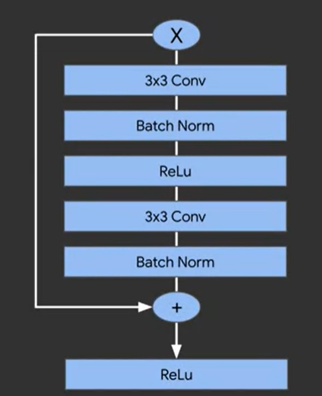

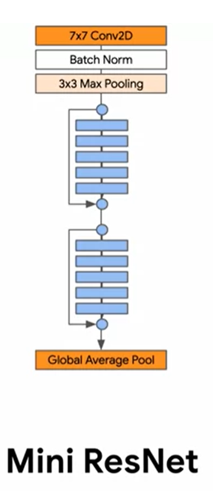

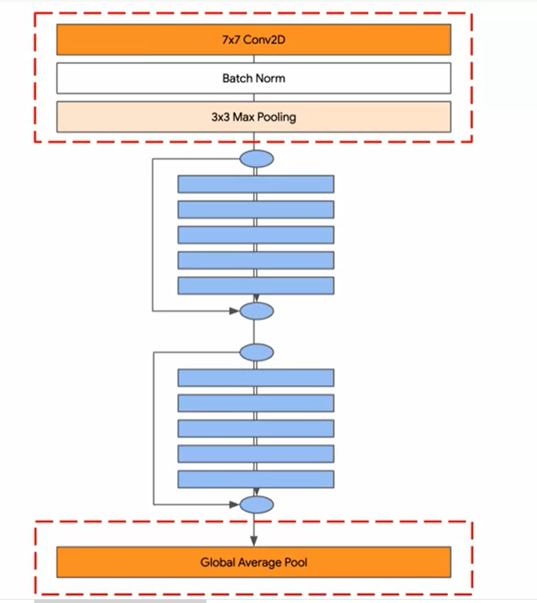

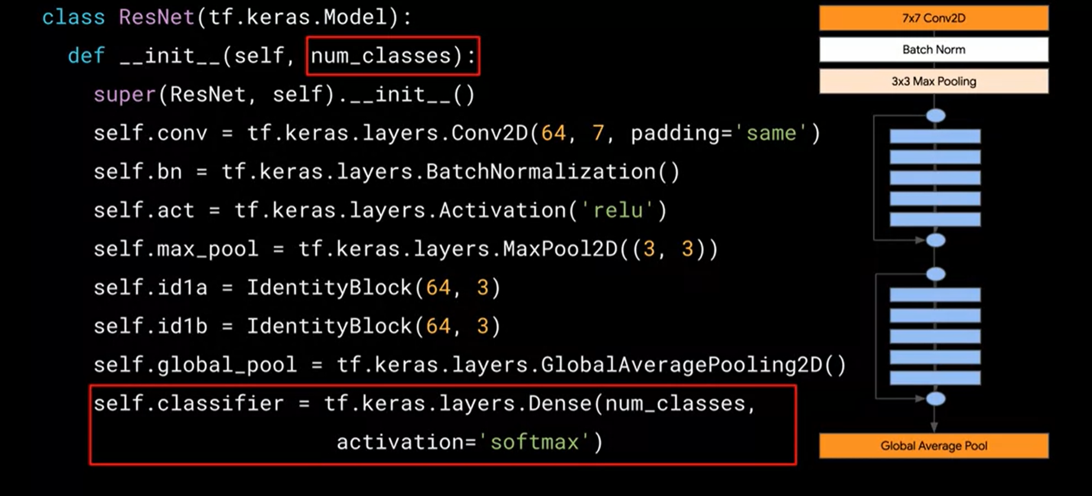

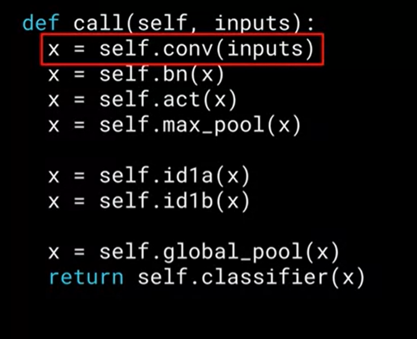

In [7]:
class IdentityBlock(tf.keras.Model):
  def __init__(self,filters,kernel_size):
    super(IdentityBlock,self).__init__(name='')

    self.conv1 = tf.keras.layers.Conv2D(filters,kernel_size,padding='same')
    self.bn1 = tf.keras.layers.BatchNormalization()

    self.conv2 = tf.keras.layers.Conv2D(filters,kernel_size,padding='same')
    self.bn2 = tf.keras.layers.BatchNormalization()

    self.act = tf.keras.layers.Activation('relu')

    self.add = tf.keras.layers.Add()

  def call(self,input_tensor):
    x = self.conv1(input_tensor)
    x = self.bn1(x)
    x = self.act(x)

    x = self.conv2(input_tensor)
    x = self.bn2(x)
    x = self.act(x)

    x = self.add([x,input_tensor])
    x = self.act(x)

    return x



In [8]:
class ResNet(tf.keras.Model):
  def __init__(self,num_classes):
    super(ResNet,self).__init__()

    self.conv = tf.keras.layers.Conv2D(64,7,padding='same')
    self.bn = tf.keras.layers.BatchNormalization()
    self.act = tf.keras.layers.Activation('relu')
    self.max_pool = tf.keras.layers.MaxPool2D((3,3))

    self.id1a =  IdentityBlock(64,3)
    self.id1b = IdentityBlock(64,3)

    self.global_pool = tf.keras.layers.GlobalAveragePooling2D()
    self.classifier = tf.keras.layers.Dense(num_classes,activation='softmax')

  def call(self,inputs):
    x = self.conv(inputs)
    x = self.bn(x)
    x = self.act(x)
    x = self.max_pool(x)

    x = self.id1a(x)
    x = self.id1b(x)

    x = self.global_pool(x)
    return self.classifier(x)


In [11]:
# utility function to normalize the images and return (image, label) pairs.
def preprocess(features):
    return tf.cast(features['image'], tf.float32) / 255., features['label']

# create a ResNet instance with 10 output units for MNIST
resnet = ResNet(10)
resnet.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# load and preprocess the dataset
dataset = tfds.load('mnist', split=tfds.Split.TRAIN, data_dir='./data')
dataset = dataset.map(preprocess).batch(32)

# train the model.
resnet.fit(dataset, epochs=1)

local data directory. If you'd instead prefer to read directly from our public
GCS bucket (recommended if you're running on GCP), you can instead pass
`try_gcs=True` to `tfds.load` or set `data_dir=gs://tfds-data/datasets`.





Dataset mnist downloaded and prepared to ./data/mnist/3.0.1. Subsequent calls will reuse this data.


1875/1875 [==============================] - 183s 98ms/step - loss: 0.2346 - accuracy: 0.9502
